### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 7
### Due: Saturday, Mar 29th at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [1]:
# install the relevant interactive plot packages
# only do this once
!pip install ipywidgets ipympl

In [ ]:
# Makes the plot interactive. 
# You can pan the image.

### always do this line at the start 
### of an interactive plotting cell


%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(___, ___, y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(___.flatten(), ___.flatten(), ___, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [2]:
### Always do this line at the start
### of a static plotting cell
%matplotlib inline

In [1]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt

(500, 4)
[[7.89482470e+00 2.63234381e+00]
 [5.23667439e-01 5.16213039e-01]
 [4.36807264e+00 4.49797669e+00]
 [9.02019387e-01 5.22076883e+00]
 [9.78903126e+00 9.89811355e+00]
 [9.45400948e+00 2.78191988e+00]
 [4.26173541e+00 5.50099792e-01]
 [6.59241531e+00 1.67069289e+00]
 [7.39734159e+00 4.14937136e+00]
 [6.20226770e+00 9.79055839e+00]
 [4.75152979e+00 3.89707886e+00]
 [6.91205252e+00 1.22285682e-01]
 [5.87007872e+00 5.35816687e+00]
 [7.16273325e+00 2.13704138e+00]
 [3.32748470e-01 6.02805972e+00]
 [1.93100830e+00 3.59913813e+00]
 [1.72619757e+00 5.88120042e+00]
 [7.26958724e+00 3.04535689e+00]
 [5.21301802e+00 8.80251708e+00]
 [1.75971234e+00 3.45806451e+00]
 [1.02840078e+00 3.09926152e+00]
 [7.90004716e+00 7.42005159e+00]
 [1.02463841e+00 8.73578446e+00]
 [5.76148455e+00 2.18979040e+00]
 [7.23181969e+00 7.99495103e+00]
 [9.08881755e-01 3.65359467e+00]
 [8.19503269e+00 1.81230939e+00]
 [4.76836959e+00 6.26290478e+00]
 [5.75918452e+00 4.42741710e+00]
 [1.14915461e+00 7.04493203e-01]
 

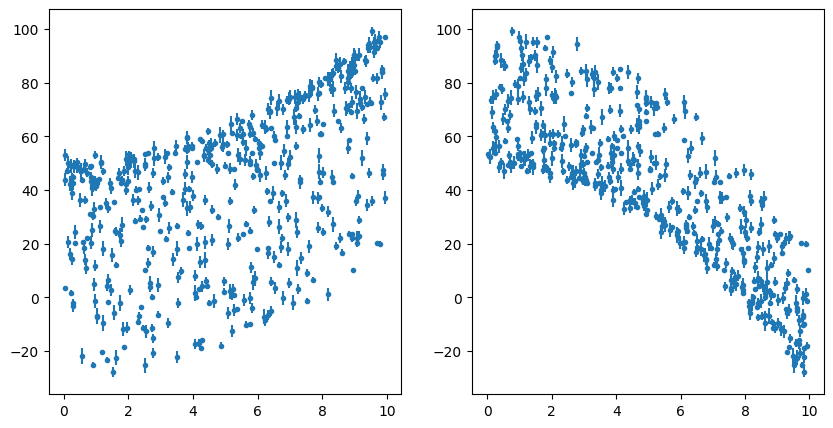

In [2]:
#Problem 1
%matplotlib inline
data= np.load("../../../homeworks/hw_data/hw7_data_1.npy")
print(np.shape(data))

X=data[:, :2] #features
y=data[:, 2] #labels
yerr=data[:, 3] #label errors
print(X)
fig, ax= plt.subplots(1,2, figsize=(10,5))

ax[0].errorbar(X[:,0], y,  yerr, fmt=".")
ax[1].errorbar(X[:,1], y,  yerr, fmt=".")

plt.tight_layout
plt.show()

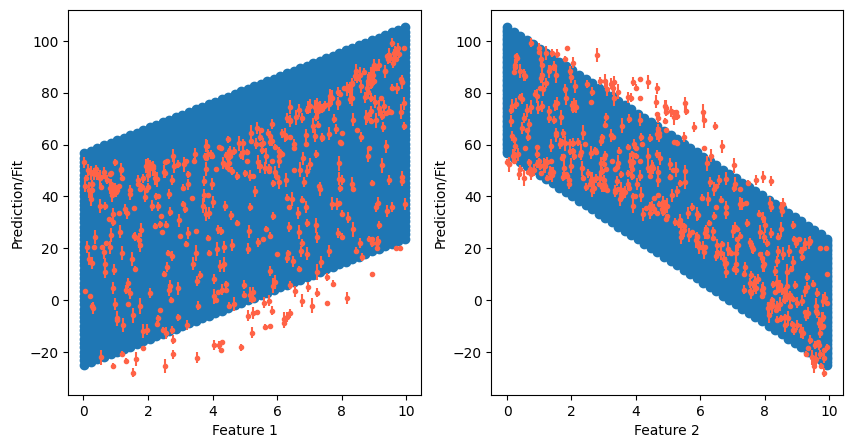

In [3]:
#Problem 2
%matplotlib inline
from sklearn.linear_model import LinearRegression
u = np.linspace(np.min(X[:, 0]),np.max(X[:,0]), 50)
v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 50)
Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(u, v)))).T
lin_reg = LinearRegression()
lin_reg.fit(X, y, sample_weight=1.0)
y_pred = lin_reg.predict(Xgrid)

fig, ax= plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(Xgrid[:,0], y_pred)
ax[0].errorbar(X[:,0], y,  yerr, fmt=".", color="tomato")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Prediction/Fit")
ax[1].scatter(Xgrid[:,1], y_pred)
ax[1].errorbar(X[:,1], y,  yerr, fmt=".", color="tomato")
ax[1].set_xlabel("Feature 2")
ax[1].set_ylabel("Prediction/Fit")


plt.tight_layout
plt.show()

SRT: Where are your data uncertainties, Brayan? -2 points

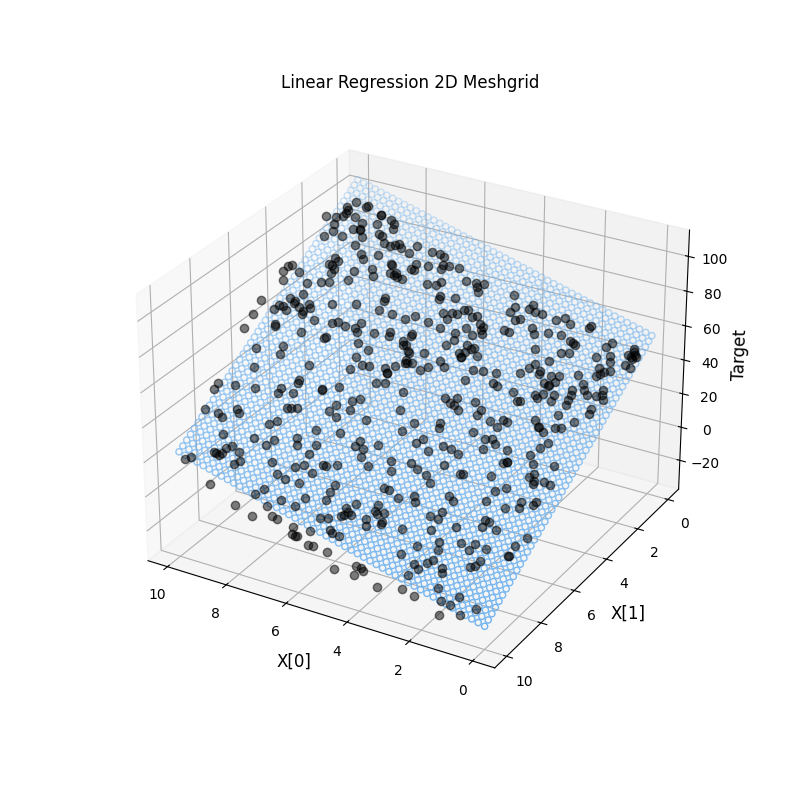

In [4]:
#Problem 3
%matplotlib widget 
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Linear Regression 2D Meshgrid")

ax.view_init(elev=28, azim=120)

4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

######################## GridSearchCV #######################
Best Parameters: {'alpha': 1.0, 'solver': 'svd'}
Best Score (Negative MSE): 0.9290800590702192
########################### RidgeCV #########################
Best Parameters: 1.0
Best Score (Negative MSE): 0.9309222374744005
Yes the alpha's for both CVs agree


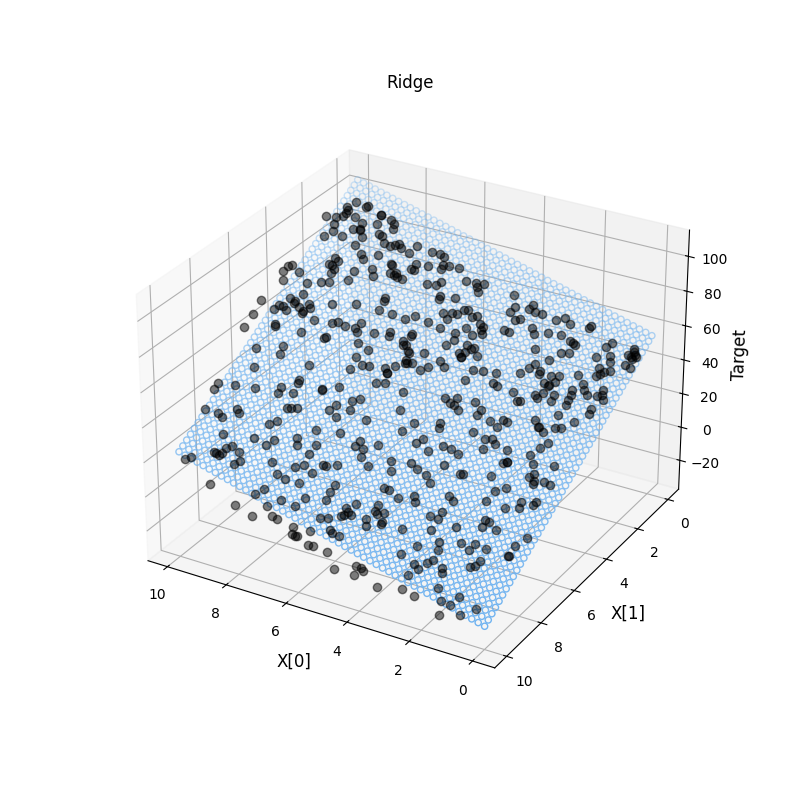

No such comm: ffec82939cd04edba64e23a93b8ffc4f


In [5]:
%matplotlib widget 
#Problem 4
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV


ridge_params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0], 'solver': ['svd', 'lsqr']}

grid_search= GridSearchCV(Ridge(), ridge_params)

grid_search.fit(X, y)

y_pred= grid_search.predict(Xgrid)

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Ridge")
ax.view_init(elev=28, azim=120)

# Display results
print("######################## GridSearchCV #######################")
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

ridge_cv = RidgeCV(alphas=[0.05, 0.1, 0.2, 0.5, 1.0]).fit(X, y)

print("########################### RidgeCV #########################")
print("Best Parameters:", ridge_cv.alpha_)
print("Best Score (Negative MSE):", ridge_cv.score(X,y))

print("Yes the alpha's for both CVs agree")


SRT: Good, but again no uncertainties accounted for?

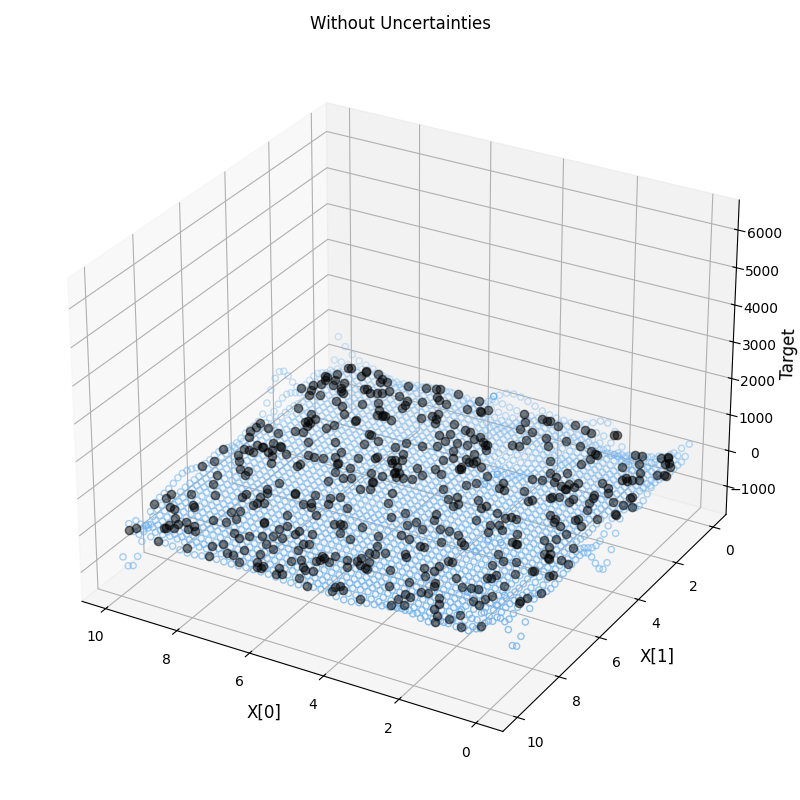

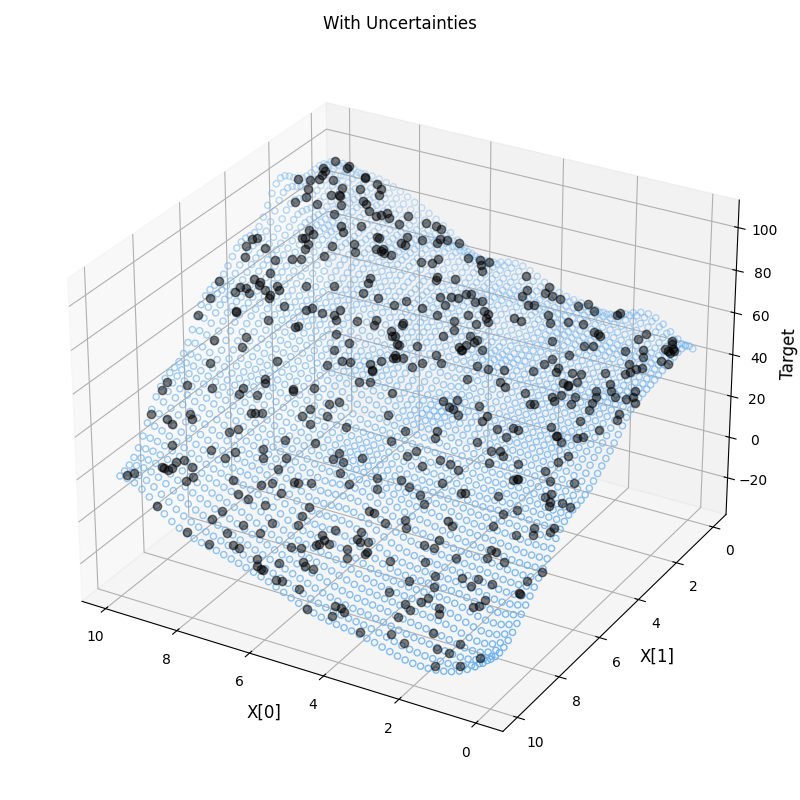

In [6]:
%matplotlib widget
from sklearn.gaussian_process import GaussianProcessRegressor

# --- Gaussian Process Regression ---
# Without uncertainties
gpr_no_uncert = GaussianProcessRegressor()
gpr_no_uncert.fit(X, y)

# With uncertainties (alpha = (yerr/y)**2)
alpha = (yerr / y)**2
gpr_with_uncert = GaussianProcessRegressor(alpha=alpha)
gpr_with_uncert.fit(X, y)


# Predictions without uncertainties
y_pred_no, sigma_no = gpr_no_uncert.predict(Xgrid, return_std=True)

# Predictions with uncertainties
y_pred_with, sigma_with = gpr_with_uncert.predict(Xgrid, return_std=True)

#Plotting (without uncertainties)
# fig, ax= plt.subplots(1,2, figsize=(10,5))

# ax[0].scatter(Xgrid[:,0], y_pred_no)
# ax[0].errorbar(X[:,0], y,  yerr, fmt=".", color="tomato")
# ax[0].set_xlabel("Feature 1")
# ax[0].set_ylabel("Prediction/Fit")
# ax[1].scatter(Xgrid[:,1], y_pred_no)
# ax[1].errorbar(X[:,1], y,  yerr, fmt=".", color="tomato")
# ax[1].set_xlabel("Feature 2")
# ax[1].set_ylabel("Prediction/Fit")

# fig.suptitle('Without Uncertainties', fontsize=16)
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_no, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("Without Uncertainties")
ax.view_init(elev=28, azim=120)

plt.tight_layout()
plt.show()

#Plotting (with uncertainties)
# fig, ax= plt.subplots(1,2, figsize=(10,5))

# ax[0].scatter(Xgrid[:,0], y_pred_with)
# ax[0].errorbar(X[:,0], y,  yerr, fmt=".", color="tomato")
# ax[0].set_xlabel("Feature 1")
# ax[0].set_ylabel("Prediction/Fit")
# ax[1].scatter(Xgrid[:,1], y_pred_with)
# ax[1].errorbar(X[:,1], y,  yerr, fmt=".", color="tomato")
# ax[1].set_xlabel("Feature 2")
# ax[1].set_ylabel("Prediction/Fit")

# fig.suptitle('With Uncertainties', fontsize=16)

#Plot
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_pred_with, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("With Uncertainties")
ax.view_init(elev=28, azim=120)

plt.tight_layout()
plt.show()


This appears to fit the data closer than Linear and GPR


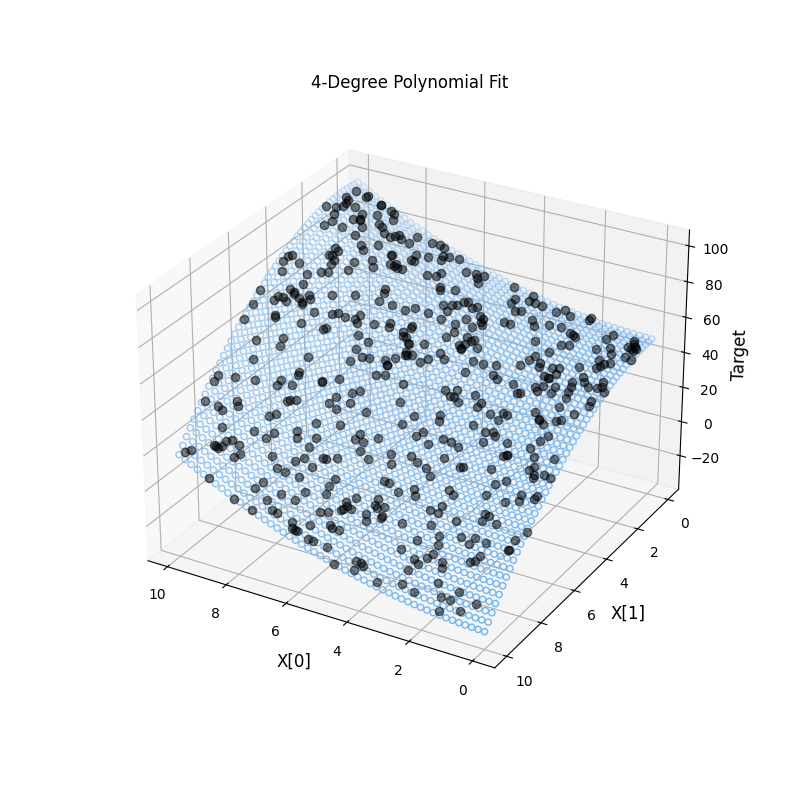

In [9]:
#Problem 6
%matplotlib widget 
from astroML.linear_model import PolynomialRegression
#Fit 4 degree polynomial and predict
poly = PolynomialRegression(4)
poly.fit(X,y)
y_poly = poly.predict(Xgrid)



#Plot
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', 
        zorder=15, linestyle='none', 
        marker='o', alpha=0.5)
ax.scatter(Xgrid[:,0].flatten(), Xgrid[:,1].flatten(), y_poly, 
           facecolor=(0,0,0,0), s=20, 
           edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title("4-Degree Polynomial Fit")
ax.view_init(elev=28, azim=120)
print("This appears to fit the data closer than Linear and GPR")

SRT: You have to account for data uncertainties in your fitting. -1 point

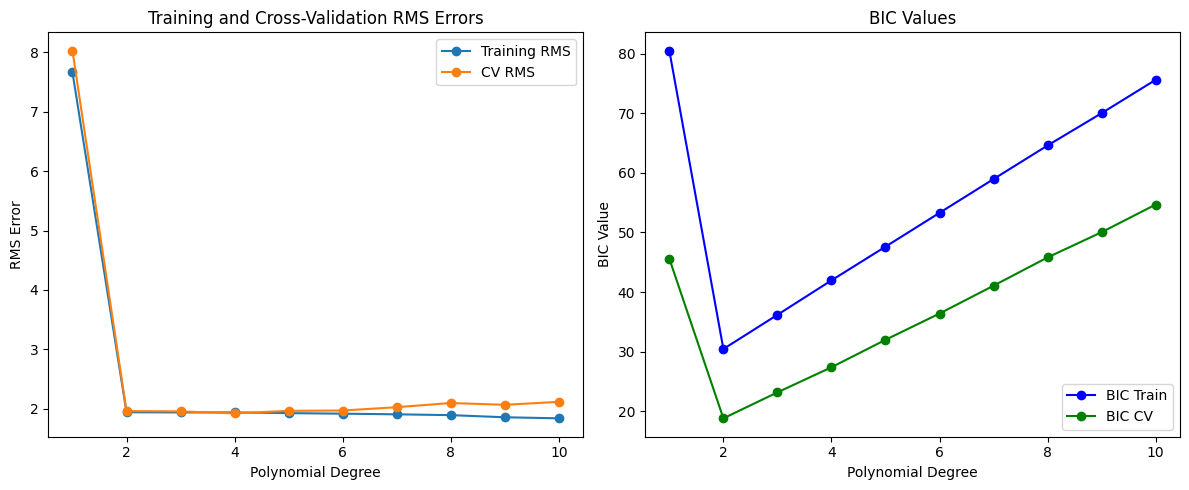

Optimal Polynomial Degree: 2
Test RMS Error: 1.8038


In [11]:
%matplotlib inline
#Problem 7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Setting Data sets
X_train, X_test, y_train, y_test, yerr_train, yerr_test = train_test_split(X, y, yerr, test_size=0.2) #Setting Training (which will get split) and Testing sets
X_train, X_cv, y_train, y_cv, yerr_train, yerr_cv = train_test_split(X_train, y_train, yerr_train, test_size=0.2) #Split Training set into Training and CV sets


#Set parameters
degrees = np.arange(1, 11)  # Polynomial degrees from 1 to 10
training_err = np.zeros(len(degrees))
crossval_err = np.zeros(len(degrees))

#Loop through polynomial degrees
for i in range(len(degrees)):
    #Fit Polynomial Regression model
    model = PolynomialRegression(degrees[i])
    model.fit(X_train, y_train, yerr_train)

    #Predictions for test and CV
    y_train_pred = model.predict(X_train)
    y_cv_pred = model.predict(X_cv)

    #RMS errors (from Lecture 17)
    training_err[i] = np.sqrt(np.sum((y_train_pred - y_train) ** 2) / len(y_train))
    crossval_err[i] = np.sqrt(np.sum((y_cv_pred - y_cv) ** 2) / len(y_cv))

#BIC (also from Lecture 17)
BIC_train = np.sqrt(len(y_train)) * training_err / np.mean(yerr_train) + degrees * np.log(len(y_train))
BIC_crossval = np.sqrt(len(y_cv)) * crossval_err / np.mean(yerr_cv) + degrees * np.log(len(y_cv))

#Plot RMS and BIC
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot RMS errors
axs[0].plot(degrees, training_err, label='Training RMS', marker='o')
axs[0].plot(degrees, crossval_err, label='CV RMS', marker='o')
axs[0].set_xlabel('Polynomial Degree')
axs[0].set_ylabel('RMS Error')
axs[0].set_title('Training and Cross-Validation RMS Errors')
axs[0].legend()

# Plot BIC values
axs[1].plot(degrees, BIC_train, label='BIC Train', marker='o', color='blue')
axs[1].plot(degrees, BIC_crossval, label='BIC CV', marker='o', color='green')
axs[1].set_xlabel('Polynomial Degree')
axs[1].set_ylabel('BIC Value')
axs[1].set_title('BIC Values')
axs[1].legend()

plt.tight_layout()
plt.show()

#Find Optimal polynomial degree
optimal_degree = degrees[np.argmin(BIC_crossval)]
print(f"Optimal Polynomial Degree: {optimal_degree}")

#Train final model on full training data
final_model = PolynomialRegression(optimal_degree)
final_model.fit(np.concatenate([X_train, X_cv]), np.concatenate([y_train, y_cv]))

# Predict on test set
y_test_pred = final_model.predict(X_test)

# Compute test RMS error
test_rms = np.sqrt(np.sum((y_test_pred - y_test)**2) / len(y_test))
print(f"Test RMS Error: {test_rms:.4f}")




SRT: Mostly great, Brayan. You even included the data uncertainties in the fitting immediately above. But it would have been more appropriate to include the data uncertainties in the BIC calculations to weight each data point, just like in a chi-squared calculation. -1 point

46/50